# Uproot Background Shapes

**Goal:** I was concerned why my upper limits for the SM NR cross section were a factor of 2 higher than what they were when I ran over Patrick's histograms.

The 20% decrease in the signal yield was what I would expect from moving from R20 $\rightarrow$ R21 (see Sean's studies), but there were also a lot more background events in Patrick's histograms, so Sean suggested that I compare the shapes for the two background histograms.

In [26]:
import uproot 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

### Load in the nano-Ntuple histograms

In [2]:
myFile = uproot.open("baseline_2016.root")

mySig = myFile["sm_hh"]
myBkg = myFile["qcd_hh"]


In [3]:
myBkg.edges

array([ 150.,  250.,  262.,  275.,  288.,  302.,  317.,  332.,  348.,
        365.,  383.,  402.,  422.,  443.,  465.,  488.,  512.,  537.,
        563.,  591.,  620.,  651.,  683.,  717.,  752.,  789.,  828.,
        869.,  912.,  957., 1004., 1054., 1106., 1161., 1219., 1279.,
       1342., 1409., 1479., 1552., 1629., 1710., 1795., 1884., 1978.,
       2076.])

In [4]:
len(myBkg.values)

45

### Load in Patrick's histograms

Since these histograms didn't get saved with corresponding bin widths, I'm going to use my best guess for them from looking at the XhhResolved code.

In [3]:
patricksFile = uproot.open("../../statcode/HistFiles/resolved_4bSR_2016.root")

sm = patricksFile["sm_hh"]
qcd = patricksFile["qcd_hh"]
allhad = patricksFile["allhad_hh"]
semilep = patricksFile["nonallhad_hh"]

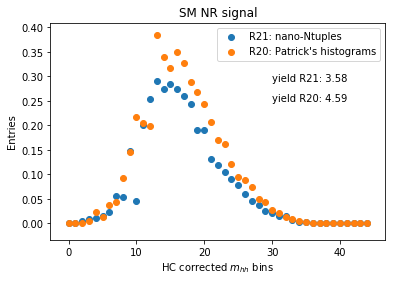

In [58]:
plt.scatter(mySig.edges[:-1],mySig.values,label="R21: nano-Ntuples")
plt.scatter(sm.edges[:-1],sm.values,label="R20: Patrick's histograms")

plt.text(30,0.29,'yield R21: {:.3}'.format(np.sum(mySig)))
plt.text(30,0.25,'yield R20: {:.3}'.format(np.sum(sm)))

plt.legend()
plt.xlabel('HC corrected $m_{hh}$ bins')
plt.ylabel('Entries')
plt.title("SM NR signal")
plt.savefig('figures/rw_2b/cf_sm_hh.pdf')
plt.show()

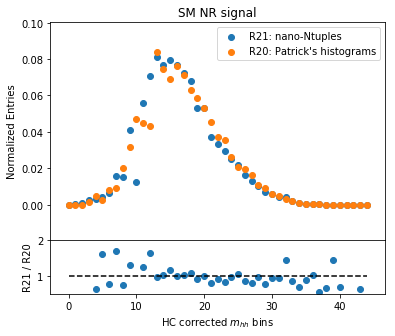

In [59]:
fig = plt.figure(figsize=(6,5))
gs = gridspec.GridSpec(5,1)
ax1 = fig.add_subplot(gs[:4,0])
ax2 = fig.add_subplot(gs[4:,0],sharex=ax1)
fig.subplots_adjust(hspace=0)

mySig_norm = mySig.values / np.sum(mySig)
sm_norm = sm.values / np.sum(sm)

ax1.scatter(mySig.edges[:-1],mySig_norm,
            label="R21: nano-Ntuples")
ax1.scatter(sm.edges[:-1],sm_norm,
            label="R20: Patrick's histograms")

ax2.scatter(mySig.edges[:-1],mySig_norm / sm_norm)
ax2.plot([mySig.edges[0],mySig.edges[-2]],[1]*2,'k--')
ax2.set_ylim((0.5,2))

ax1.legend()
ax2.set_xlabel('HC corrected $m_{hh}$ bins')
ax1.set_ylabel('Normalized Entries')
ax2.set_ylabel('R21 / R20')
ax1.set_title("SM NR signal")
plt.savefig('figures/rw_2b/cf_sm_hh_norm.pdf',bbox_inches='tight')
plt.show()

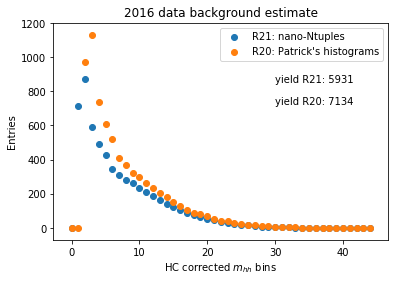

In [60]:
r20_bkg = qcd.values + allhad.values + semilep.values

plt.scatter(myBkg.edges[:-1],myBkg.values,label="R21: nano-Ntuples")
plt.scatter(myBkg.edges[:-1],r20_bkg,label="R20: Patrick's histograms")

plt.text(30,850,'yield R21: {:.0f}'.format(np.sum(myBkg)))
plt.text(30,725,'yield R20: {:.0f}'.format(np.sum(r20_bkg)))

plt.legend()
plt.xlabel('HC corrected $m_{hh}$ bins')
plt.ylabel('Entries')
plt.title("2016 data background estimate")
plt.savefig('figures/rw_2b/cf_qcd_allhad_nonallhad_hh.pdf',bbox_inches='tight')
plt.show()

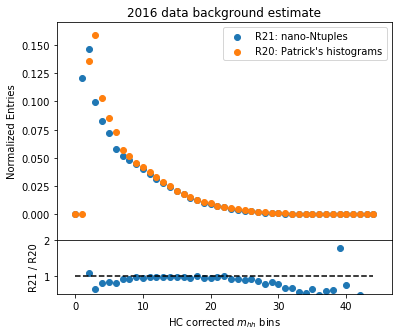

In [61]:
fig = plt.figure(figsize=(6,5))
gs = gridspec.GridSpec(5,1)
ax1 = fig.add_subplot(gs[:4,0])
ax2 = fig.add_subplot(gs[4:,0],sharex=ax1)
fig.subplots_adjust(hspace=0)

myBkg_norm = myBkg.values / np.sum(myBkg)
r20_norm = r20_bkg / np.sum(r20_bkg)

ax1.scatter(myBkg.edges[:-1],myBkg_norm,
            label="R21: nano-Ntuples")
ax1.scatter(myBkg.edges[:-1],r20_norm,
            label="R20: Patrick's histograms")

ax2.scatter(myBkg.edges[:-1],myBkg_norm / r20_norm)
ax2.plot([myBkg.edges[0],myBkg.edges[-2]],[1]*2,'k--')
ax2.set_ylim((0.5,2))

ax1.legend()
ax2.set_xlabel('HC corrected $m_{hh}$ bins')
ax1.set_ylabel('Normalized Entries')
ax2.set_ylabel('R21 / R20')
ax1.set_title("2016 data background estimate")
plt.savefig('figures/rw_2b/cf_qcd_allhad_nonallhad_hh_norm.pdf',bbox_inches='tight')
plt.show()

Ok, let's compare the distributions!

In [7]:
def plotify(edges, values):
    '''
    Given the edges and values for a histogram, return x,v pairs that makes it easy to put in a plot
    '''
    
    x = np.concatenate([(x_low, 0.5*(x_low + x_high), x_high) for x_low, x_high in zip(edges[:-1],edges[1:])] )
    v = np.array([vi for vi in values for i in range(3)])

    return x,v

2b BDT rw events: 17791.867050095683
semileptonic $t\bar{t}$: 368.65606689453125
all had $t\bar{t}$: 776.9423828125
qcd: 20255.744140625


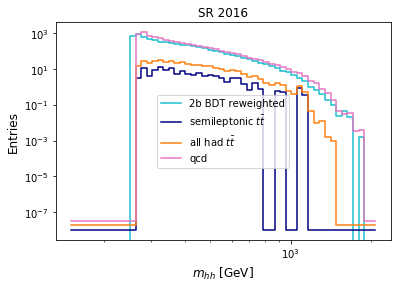

In [20]:
x,v0 = plotify(myBkg.edges,myBkg.values)

print('2b BDT rw events: {}'.format(v0.sum()))

plt.plot(x,v0, 'C9', label='2b BDT reweighted')


'''
Overlay the backgrounds from Patrick's histograms
'''

vstack = np.zeros_like(v0)
vs = []
norm = 0
for hi, c, l in zip([semilep,allhad,qcd],['navy','C1','C6'],[r'semileptonic $t\bar{t}$',r'all had $t\bar{t}$','qcd']):
    _,v = plotify(myBkg.edges,hi.values)
    
    vstack += v
    
    vs.append(v)
    norm += np.sum(v)
    
    print('{}: {}'.format(l,v.sum()))
    plt.plot(x,vstack, c,label=l)

plt.xlabel('$m_{hh}$ [GeV]',fontsize=12)
plt.ylabel('Entries',fontsize=12)
plt.legend()
plt.title('SR 2016')
plt.xscale('log')
plt.yscale('log')
plt.savefig('figures/rw_2b/m4j_cfPatrick.pdf')

plt.show()

In [10]:
776.9423828125 / 20255.744140625

0.03835664478276368

In [11]:
368.65606689453125 / 20255.744140625

0.01820007521496844

In [12]:
(776.9423828125 + 368.65606689453125) / 20255.744140625

0.056556719997732124

In [13]:
np.sum(v0)

17791.867050095683

Ok, good sanity check, MJ accounts for 95% of the background in Patrick's histograms, as we anticipated from reading the int note.

Now draw them normalized and make a ratio plot!

semileptonic $t\bar{t}$: 0.017225835472345352
all had $t\bar{t}$: 0.03630344197154045
qcd: 0.9464706182479858


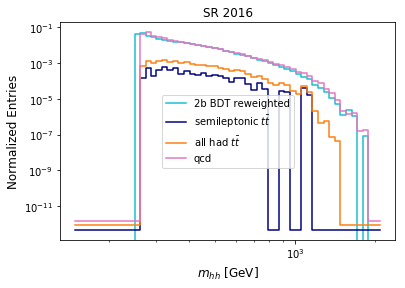

In [21]:
plt.plot(x, v0/np.sum(v0), 'C9', label='2b BDT reweighted')

'''
Overlay the backgrounds from Patrick's histograms
'''
vstack = np.zeros_like(v0)
norm_vs = [vi/norm for vi in vs]
for vi, c, l in zip(norm_vs,['navy','C1','C6'],[r'semileptonic $t\bar{t}$',r'all had $t\bar{t}$','qcd']):
    
    print('{}: {}'.format(l,vi.sum()))
    vstack += vi
    plt.plot(x,vstack, c,label=l)

plt.xlabel('$m_{hh}$ [GeV]',fontsize=12)
plt.ylabel('Normalized Entries',fontsize=12)
plt.legend()
plt.title('SR 2016')
plt.xscale('log')
plt.yscale('log')
plt.savefig('figures/rw_2b/m4j_cfPatrick_norm.pdf')
plt.show()

In [22]:
myBkg.values

array([0.00000000e+00, 7.16235392e+02, 8.70344068e+02, 5.90087671e+02,
       4.89033182e+02, 4.24625183e+02, 3.45093472e+02, 3.07845204e+02,
       2.83096597e+02, 2.62286395e+02, 2.35654922e+02, 2.12112314e+02,
       1.86748881e+02, 1.65152567e+02, 1.42453003e+02, 1.20289052e+02,
       1.03977006e+02, 8.47149077e+01, 7.40733459e+01, 6.13817517e+01,
       5.30901309e+01, 4.35444205e+01, 3.58685864e+01, 2.82404620e+01,
       2.32560946e+01, 1.82286454e+01, 1.48668377e+01, 1.11868505e+01,
       7.96836370e+00, 6.65892750e+00, 4.65894579e+00, 3.12178804e+00,
       2.21565646e+00, 1.01055247e+00, 7.06382152e-01, 4.20313575e-01,
       1.91234095e-01, 9.36361615e-02, 2.33183231e-02, 4.37316453e-02,
       2.10154366e-02, 0.00000000e+00, 1.54163714e-03, 0.00000000e+00,
       0.00000000e+00])

In [23]:
qcd.values

array([9.9999999e-09, 9.9999999e-09, 9.5519720e+02, 1.1032444e+03,
       7.1491174e+02, 5.8186877e+02, 4.8696558e+02, 3.8097235e+02,
       3.4000952e+02, 3.0022052e+02, 2.7676556e+02, 2.4517592e+02,
       2.1556081e+02, 1.8483812e+02, 1.6319670e+02, 1.3393352e+02,
       1.1596597e+02, 9.6964516e+01, 8.1166893e+01, 6.9861763e+01,
       5.9653961e+01, 4.8985748e+01, 3.9506210e+01, 3.3560722e+01,
       2.7741323e+01, 2.2696329e+01, 1.8259132e+01, 1.4197846e+01,
       1.1277600e+01, 8.9621763e+00, 6.8722315e+00, 4.6286645e+00,
       3.4066024e+00, 2.1993396e+00, 1.5808113e+00, 7.7901947e-01,
       4.7652560e-01, 1.9345130e-01, 4.5121834e-02, 2.9751221e-02,
       3.4377635e-02, 3.2930793e-03, 3.9536543e-03, 9.9999999e-09,
       9.9999999e-09], dtype=float32)

**Question:** Do any of Patrick's histograms correspond to the uncorrected $m_{4j}$?

In [15]:
for k in patricksFile.keys():
    hi = patricksFile[k]
    ti = hi.title.decode()
    if ('m4j' in ti) and ('cor' not in ti):
        print(k)

It looks like the answer is *no*, but when I looked at the `execute` function from [Patrick's code](https://gitlab.cern.ch/hh4b/XhhResolved/blob/master/Root/hh4bHists.cxx#L256-262), it looks like the 

In [ ]:
hi.title